## Movie Recommender System II (Content Based)
Kuldeep Singh (541673),
Vipin Rakkanath (541674),
Arun Kumar (541675)

In [1]:
import pandas as pd
import numpy as np

The dataset has been obtained from Kaggle "https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/download?datasetVersionNumber=2"

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.info()
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
movies.rename(columns={'id': 'movie_id'}, inplace=True)

In [5]:
credits = credits.drop('title', axis=1)

In [6]:
movies_merged = movies.merge(credits, on='movie_id')
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Creting 3 dataframe for three approaces

# Approach I - Baseline (Based on vote_count and vote_average)

In [7]:
#We will separate numerical data for this approach
df_numerical = movies_merged[['movie_id','title','popularity','vote_average','vote_count']]
df_numerical.head()

,movie_id,title,popularity,vote_average,vote_count
0,19995,Avatar,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,4500
2,206647,Spectre,107.376788,6.3,4466
3,49026,The Dark Knight Rises,112.312950,7.6,9106
4,49529,John Carter,43.926995,6.1,2124


In [8]:
#finding missing data
df_numerical.isnull().sum()

movie_id        0
title           0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [9]:
#checking for duplicate entry
df_numerical.duplicated().sum()

0

In [10]:
# Insight into numerical data
df_numerical. loc[(df_numerical['vote_count'] <=2) & (df_numerical['vote_average'] >=9)]

,movie_id,title,popularity,vote_average,vote_count
2386,69848,One Man's Hero,0.910529,9.3,2
3519,89861,Stiff Upper Lips,0.356495,10.0,1
3992,346081,Sardaarji,0.296981,9.5,2
4045,78373,"Dancer, Texas Pop. 81",0.376662,10.0,1
4247,361505,Me You and Five Bucks,0.094105,10.0,2
4662,40963,Little Big Top,0.092100,10.0,1


we can see that there are entries with 10 as vote_avg with just one vote count. So, we will use formula which is being used by IMDB: weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

R = vote_average

v = vote_count

m = minimum votes required

C = the mean vote across dataset

In [11]:
C = df_numerical['vote_average'].mean()
C

6.092171559442016

The mean rating for all the movies is approx 6.1/10. Now, we need to determine an appropriate value for m, the minimum votes required to be listed in one of the top movies. We will use 90th percentile as our cutoff. This means, for a movie to feature in the top, it must have more votes than at least 90% of the movies in the list.

In [12]:
m= df_numerical['vote_count'].quantile(0.9)
m

1838.4000000000015

In [13]:
top_movies = df_numerical.copy().loc[df_numerical['vote_count'] >= m]
top_movies.shape

(481, 5)

We see that only 481 movies qualify, now we will calculte wighted score for these movies

In [14]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [15]:
#adding a new ield with score
top_movies['score'] = top_movies.apply(weighted_rating, axis=1)

In [16]:
#Sort movies based on score calculated above
top_movies = top_movies.sort_values('score', ascending=False)

In [17]:
top_movies.head()

,movie_id,title,popularity,vote_average,vote_count,score
1881,278,The Shawshank Redemption,136.747729,8.5,8205,8.059258
662,550,Fight Club,146.757391,8.3,9413,7.939256
65,155,The Dark Knight,187.322927,8.2,12002,7.920020
3232,680,Pulp Fiction,121.463076,8.3,8428,7.904645
96,27205,Inception,167.583710,8.1,13752,7.863239


Text(0.5, 1.0, 'Popular Movies')

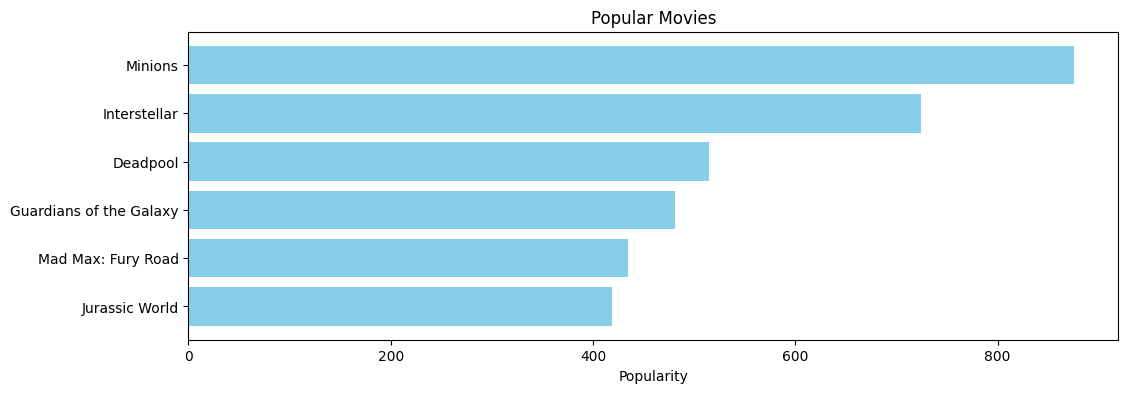

In [18]:
pop= df_numerical.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'Top Recommended Movies')

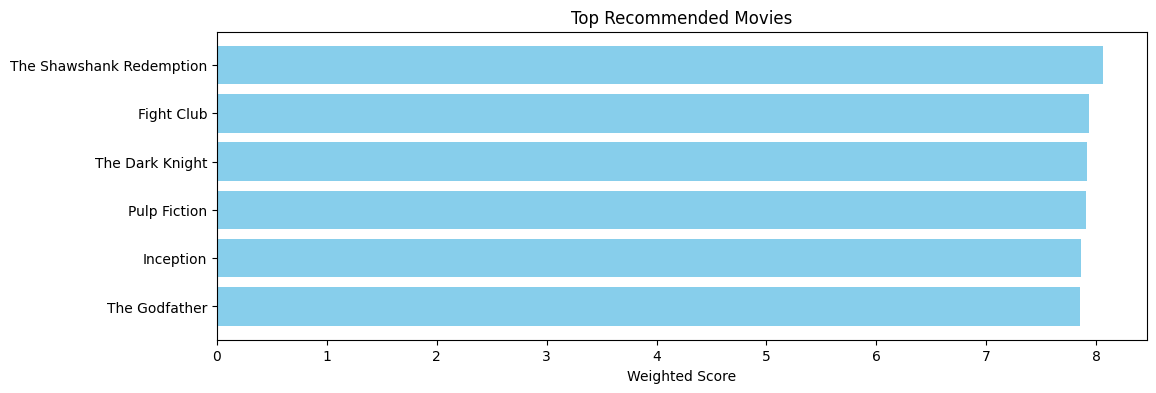

In [19]:

plt.figure(figsize=(12,4))

plt.barh(top_movies['title'].head(6),top_movies['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Weighted Score")
plt.title("Top Recommended Movies")

# Approach II - Content Based Filtering

In content baased, we will be using TFIDF approach with two approaces with diferent sets od data.In first, we will use 'geners','keyword' and 'cast'. In second, we will use 'movie_id','title','overview','genres','keywords','cast', and'crew'.We will create TFIDF vectors for data.

In [20]:
movies_merged

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""cr

In [21]:
#Visualising data
df_all = movies_merged[['movie_id','title','overview','genres','keywords','cast','crew']]
df_all.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Data Preprocessing

The data conains dictonaries, list, string etc so we will check each column and clean it.

In [22]:
#finding missing data
df_all.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [23]:
# Three movies does not have overview and it is a very small number, so we can drop them.
df_all.dropna(inplace = True)
df_all.isnull().sum()

/tmp/ipykernel_3320831/4175015434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.dropna(inplace = True)


movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [24]:
#checking for duplicate entry
df_all.duplicated().sum()

0

In [25]:
movies_merged['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

It is a string with list of dictonary. We need to convert it to list of generes. Literal eval can be used to convert sting of list to list.

In [26]:
import ast

In [27]:
def clean(geners):
    L = []
    geners = ast.literal_eval(geners)
    for i in geners:
        L.append(i['name'])
    return L

In [28]:
df_all['genres'].apply(clean)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4800, dtype: object

In [29]:
df_all['genres'] = movies_merged['genres'].apply(clean)

/tmp/ipykernel_3320831/1848291658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['genres'] = movies_merged['genres'].apply(clean)


In [30]:
df_all['keywords'] = df_all['keywords'].apply(clean)

/tmp/ipykernel_3320831/3216321327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['keywords'] = df_all['keywords'].apply(clean)


In [31]:
df_all['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [32]:
# we will extract only top three cast

In [33]:
def cast_clean(cast):
    L = []
    counter = 0
    cast = ast.literal_eval(cast)
    for i in cast:
        if counter < 3:
            L.append(i['name'])
        counter += 1
    return L

In [34]:
df_all['cast'].apply(cast_clean)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4800, dtype: object

In [35]:
df_all['cast'] = df_all['cast'].apply(cast_clean)

/tmp/ipykernel_3320831/896214225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['cast'] = df_all['cast'].apply(cast_clean)


In [36]:
df_all['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [37]:
#We are intrested only in name of Director

In [38]:
def director(crew):
    L = []
    crew = ast.literal_eval(crew)
    for i in crew:
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [39]:
df_all['crew'] = df_all['crew'].apply(director)

/tmp/ipykernel_3320831/2402455707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['crew'] = df_all['crew'].apply(director)


In [40]:
df_all.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [41]:
#converting overview column from string to list
df_all['overview'][0]
df_all['overview'] = df_all['overview'].apply(lambda x:x.split())

/tmp/ipykernel_3320831/3048516931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['overview'] = df_all['overview'].apply(lambda x:x.split())


In [42]:
# Spaces from name must be removed because two different person can have same first or last name. This will confuse model and recommendations can be wrong.
#So we will remove all spaces by use of a lambda function\
df_all['genres'] = df_all['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
df_all['keywords'] = df_all['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
df_all['cast'] = df_all['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
df_all['crew'] = df_all['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

/tmp/ipykernel_3320831/935737800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['genres'] = df_all['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
/tmp/ipykernel_3320831/935737800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['keywords'] = df_all['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
/tmp/ipykernel_3320831/935737800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [43]:
df_all.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [44]:
# merge all colums to produce a tag column
df_all['tags1'] =  df_all['genres'] + df_all['keywords'] + df_all['cast']
df_all['tags2'] = df_all['overview'] + df_all['genres'] + df_all['cast'] + df_all['crew']

/tmp/ipykernel_3320831/1832144636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['tags1'] =  df_all['genres'] + df_all['keywords'] + df_all['cast']
/tmp/ipykernel_3320831/1832144636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['tags2'] = df_all['overview'] + df_all['genres'] + df_all['cast'] + df_all['crew']


In [45]:
df_all.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags1,tags2
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime, spy, basedonnovel, ...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Action, Crime, Drama, Thriller, dccomics, cri...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[Action, Adventure, ScienceFiction, basedonnov...","[John, Carter, is, a, war-weary,, former, mili..."


In [46]:
df_all

,movie_id,title,overview,genres,keywords,cast,crew,tags1,tags2
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime, spy, basedonnovel, ...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Action, Crime, Drama, Thriller, dccomics, cri...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[Action, Adventure, ScienceFiction, basedonnov...","[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[Action, Crime, Thriller, unitedstates–mexicob...","[El, Mariachi, just, wants, to, play, his, gui..."
4799,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[Comedy, Romance, EdwardBurns, KerryBishé, Mar...","[A, newlywed, couple's, honeymoon, is, upended..."
4800,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[Comedy, Drama, Romance, TVMovie, date, loveat...","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4801,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[DanielHenney, ElizaCoupe, BillPaxton]","[When, ambitious, New, York, attorney, Sam, is..."


In [47]:
df_all = df_all.reset_index(drop=True)
df_all

,movie_id,title,overview,genres,keywords,cast,crew,tags1,tags2
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c...","[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,...","[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime, spy, basedonnovel, ...","[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Action, Crime, Drama, Thriller, dccomics, cri...","[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[Action, Adventure, ScienceFiction, basedonnov...","[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...,...,...,...,...,...,...
4795,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[CarlosGallardo, JaimedeHoyos, PeterMarquardt]",[RobertRodriguez],"[Action, Crime, Thriller, unitedstates–mexicob...","[El, Mariachi, just, wants, to, play, his, gui..."
4796,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[],"[EdwardBurns, KerryBishé, MarshaDietlein]",[EdwardBurns],"[Comedy, Romance, EdwardBurns, KerryBishé, Mar...","[A, newlywed, couple's, honeymoon, is, upended..."
4797,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[EricMabius, KristinBooth, CrystalLowe]",[ScottSmith],"[Comedy, Drama, Romance, TVMovie, date, loveat...","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4798,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[],"[DanielHenney, ElizaCoupe, BillPaxton]",[DanielHsia],"[DanielHenney, ElizaCoupe, BillPaxton]","[When, ambitious, New, York, attorney, Sam, is..."


In [48]:
# Creating two dataframe or two approaches in content based
df_1 = df_all[['movie_id', 'title', 'tags1']]
df_2 = df_all[['movie_id', 'title', 'tags2']]

#### Approach II(a) - Using geners, keyword and cast data

In [49]:
df_1.head()

,movie_id,title,tags1
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, basedonnov..."


In [50]:
# convering tags list to string
df_1['tags'] = df_1['tags1'].apply(lambda x: " ".join(x))
df_1 = df_1[['movie_id', 'title', 'tags']]

/tmp/ipykernel_3320831/3214578946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['tags'] = df_1['tags1'].apply(lambda x: " ".join(x))


In [51]:
df_1['tags'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver'

In [52]:
#Converting all tags to lower case
#df_2['tags2'] = df_2['tags2'].apply(lambda x: x.lower())

In [53]:
## stemming the words in tags
# import nltk
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# def convert (tags):
#     s = []
#     tags = tags.split()
#     for i in tags:
#         s.append(ps.stem(i))
#     return " ".join(s)

In [54]:
# df_1['tags'] = df_1['tags'].apply(convert)

In [55]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf_1 = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_1 = tfidf_1.fit_transform(df_1['tags'])

#Output the shape of tfidf_matrix
tfidf_matrix_1.shape

(4800, 15595)

In [56]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_1 = cosine_similarity(tfidf_matrix_1)

Function for recommending movie

In [57]:
def recommend_1(movie):
    movie_index = df_1[df_1['title']==movie].index[0]
    distances  = cosine_sim_1[movie_index]
    similar_movies = sorted(list(enumerate(distances)),reverse=True, key = lambda x:x[1])[1:6]
    for i in similar_movies:
        print(df_1.iloc[i[0]].title)
    ids = [x[0] for x in similar_movies]
    return ids

In [58]:
# recommend("Batman Begins")
ids = recommend_1("Elizabeth: The Golden Age")

Elizabeth
Duplicity
An Ideal Husband
Blood Ties
Robin Hood


In [59]:
ids

[1875, 751, 2962, 1873, 21]

#### Approach II(b) - Using geners, keyword, overview, cast and crew data

In [60]:
# convering tags list to string
df_2['tags'] = df_2['tags2'].apply(lambda x: " ".join(x))
df_2['tags'] = df_2['tags'].apply(lambda x: x.lower())
df_2 = df_2[['movie_id', 'title', 'tags']]

/tmp/ipykernel_3320831/2548878257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['tags'] = df_2['tags2'].apply(lambda x: " ".join(x))
/tmp/ipykernel_3320831/2548878257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['tags'] = df_2['tags'].apply(lambda x: x.lower())


In [61]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf_2 = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_2 = tfidf_2.fit_transform(df_2['tags'])

#Output the shape of tfidf_matrix
tfidf_matrix_2.shape

(4800, 28870)

In [62]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_2 = cosine_similarity(tfidf_matrix_2)

In [63]:
def recommend_2(movie):
    movie_index = df_2[df_2['title']==movie].index[0]
    distances  = cosine_sim_2[movie_index]
    similar_movies = sorted(list(enumerate(distances)),reverse=True, key = lambda x:x[1])[1:6]
    for i in similar_movies:
        print(df_2.iloc[i[0]].title)
    ids = [x[0] for x in similar_movies]
    return ids

#### Recommendation From Approach II(a) - Using geners, keyword and cast data

In [64]:
from ipywidgets import (widgets, interactive)
movie_dropdown = widgets.Dropdown(options=sorted(df_2['title'].tolist()), description='Movie:')

In [65]:
interactive(recommend_1,
            movie=movie_dropdown
           )

interactive(children=(Dropdown(description='Movie:', options=('#Horror', '(500) Days of Summer', '10 Cloverfie…

#### Recommendation  From Approach II(b) - Using geners, overview, cast and crew data

In [66]:
interactive(recommend_2,
            movie=movie_dropdown
           )

interactive(children=(Dropdown(description='Movie:', options=('#Horror', '(500) Days of Summer', '10 Cloverfie…

Displaying an overlap metric between the two models

In [67]:
# function for eavluation purpose, hence printing removed
def recommend_1_without_print(movie):
    movie_index = df_1[df_1['title']==movie].index[0]
    distances  = cosine_sim_1[movie_index]
    similar_movies = sorted(list(enumerate(distances)),reverse=True, key = lambda x:x[1])[1:6]
    ids = [x[0] for x in similar_movies]
    return ids

In [68]:
# function for eavluation purpose, hence printing removed
def recommend_2_without_print(movie):
    movie_index = df_2[df_2['title']==movie].index[0]
    distances  = cosine_sim_2[movie_index]
    similar_movies = sorted(list(enumerate(distances)),reverse=True, key = lambda x:x[1])[1:6]
    ids = [x[0] for x in similar_movies]
    return ids

In [69]:
movie_list = sorted(df_2['title'].tolist())
len(movie_list)

4800

In [70]:
import matplotlib.pyplot as plt

# loop through all movies in movie_list and get recommendations from both methods
recommendations = {}
for movie in movie_list:
    rec_1 = recommend_1_without_print(movie)
    rec_2 = recommend_2_without_print(movie)
    common = set(rec_1).intersection(set(rec_2))
    num_common = len(common)
    if num_common not in recommendations:
        recommendations[num_common] = 0
    recommendations[num_common] += 1


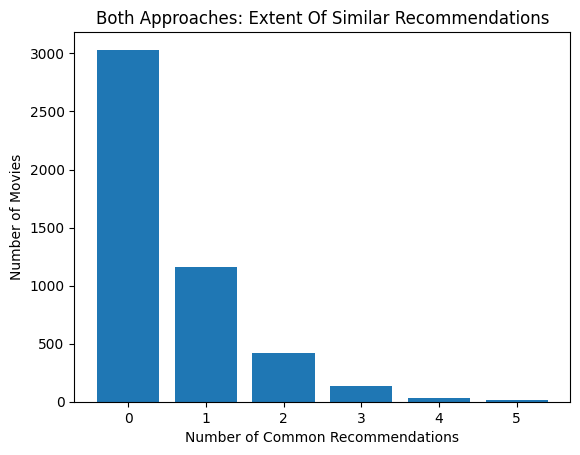

In [71]:
# plot the results as a bar chart
plt.bar(recommendations.keys(), recommendations.values())
plt.title('Both Approaches: Extent Of Similar Recommendations')
plt.xlabel('Number of Common Recommendations')
plt.ylabel('Number of Movies')
plt.show()

In [72]:
import pandas as pd
from IPython.display import display, HTML
import os

In [73]:
# Define the filename for the counter file
counter_file = 'movie_counters.txt'

In [125]:
# Define the function that will update the counters
def update_counters(movie_index):
#     with open(counter_file, 'r') as f:
#         print('Before update:', f.read())
    
    global rec_1_result, rec_2_result
    global counter_1, counter_2
    with open(counter_file, 'r') as f:
        counter_1, counter_2 = [int(x) for x in f.read().strip().split(',')]
    if movie_index in rec_1_result:
        counter_1 += 1
#     else:
#         print('no rec1')
    
    if movie_index in rec_2_result:
        counter_2 += 1
#     else:
#         print('no rec1')
    
    with open(counter_file, 'w') as f:
        f.write(f'{counter_1},{counter_2}\n')
    print("Total count: Movie from Recommender Algorithm I  selected : ", counter_1)
    print("Total count: Movie from Recommender Algorithm II selected : ", counter_2)

#     with open(counter_file, 'r') as f:
#         print('After update:', f.read())
    

In [132]:
def selected_movie(movie):
    global flag        #flag used to avoid counting the default value in dropdown as user selection
    if flag == 0:           
        flag += 1
        return
#     print("Hello, world!", movie)
    for idx, title in movie_idx_title_dict.items():
        if title == movie:
            movie_idx = idx
            break
    if flag != 0:
        update_counters(movie_idx)    
    

In [128]:
# callback function to update the selected_movie variable

def on_movie_select(movie):
    global rec_1_result, rec_2_result
    global flag
    flag = 0
    rec_1_result = recommend_1_without_print(movie)
    rec_2_result = recommend_2_without_print(movie)
#     recom_dropdown()
    return rec_1_result, rec_2_result

In [129]:
from ipywidgets import (widgets, interactive)
movie_dropdown = widgets.Dropdown(options=sorted(df_2['title'].tolist()), description='Movie:')

In [130]:
interactive(on_movie_select,
            movie=movie_dropdown
           )



interactive(children=(Dropdown(description='Movie:', options=('#Horror', '(500) Days of Summer', '10 Cloverfie…

In [135]:
# after every recommendation, i.e executing above cell. We need to execute this cell again & select 1 movie to update the counters
global rec_1_result, rec_2_result
common_list = list(set(rec_1_result + rec_2_result))
# print(common_list)
    
movie_idx_title_dict = {idx: df_all.loc[idx, 'title'] for idx in common_list}
# print(movie_idx_title_dict)
    
movie_names = [title for title in movie_idx_title_dict.values()]

from ipywidgets import (widgets, interactive)
recom_movie_dropdown = widgets.Dropdown(options=movie_names, description='Select:')
    
interactive(selected_movie,
           movie=recom_movie_dropdown
          )

interactive(children=(Dropdown(description='Select:', options=('Fugly', 'Adam', 'Mooz-lum', 'Groove', 'Veer-Za…